(lecture04:plotting-simple-functions)=
# Plotting simple functions 

We plot using the [matplotlib](https://matplotlib.org/) Python library.
Again, this is a *huge* topic and we cannot cover everything here.
In general, if you know the type of plot that you want to do a simple Google search of the type "X matplotlib" will probably send you to an example that you can adjust to your needs.

Here is how to import `matplotlib`:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Both lines are necessary in a Jupyter notebook
The second line tells the Jupyter notebook that the plots should just appear within it.

Now, the following lines are optional but they produce better-looking graphics.
See [here](https://blakeaw.github.io/2020-05-25-improve-matplotlib-notebook-inline-res/) why.
I suggest using them.

In [2]:
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')

Let's start by plotting simple 1D functions.
We are going to plot this function:

$$
f(t) = e^{-0.1t}\left[\cos(\pi t) + 0.5\sin(\pi t)\right],
$$

for $t$ between $0$ and $4\pi$.

We are going to need numpy as well:

In [3]:
import numpy as np

First you generate the data that you want to plot. Here is a dense set of x's:

In [4]:
ts = np.linspace(0, 4 * np.pi, 100)
ts

array([ 0.        ,  0.12693304,  0.25386607,  0.38079911,  0.50773215,
        0.63466518,  0.76159822,  0.88853126,  1.01546429,  1.14239733,
        1.26933037,  1.3962634 ,  1.52319644,  1.65012947,  1.77706251,
        1.90399555,  2.03092858,  2.15786162,  2.28479466,  2.41172769,
        2.53866073,  2.66559377,  2.7925268 ,  2.91945984,  3.04639288,
        3.17332591,  3.30025895,  3.42719199,  3.55412502,  3.68105806,
        3.8079911 ,  3.93492413,  4.06185717,  4.1887902 ,  4.31572324,
        4.44265628,  4.56958931,  4.69652235,  4.82345539,  4.95038842,
        5.07732146,  5.2042545 ,  5.33118753,  5.45812057,  5.58505361,
        5.71198664,  5.83891968,  5.96585272,  6.09278575,  6.21971879,
        6.34665183,  6.47358486,  6.6005179 ,  6.72745093,  6.85438397,
        6.98131701,  7.10825004,  7.23518308,  7.36211612,  7.48904915,
        7.61598219,  7.74291523,  7.86984826,  7.9967813 ,  8.12371434,
        8.25064737,  8.37758041,  8.50451345,  8.63144648,  8.75

Now evalute the function values at each one of these points.

In [5]:
ys = np.exp(-0.1 * ts) * (np.cos(np.pi * ts) + 0.5 * np.cos(np.pi * ts))
ys

array([ 1.5       ,  1.36487265,  1.0214371 ,  0.5281828 , -0.03462964,
       -0.57796286, -1.01803271, -1.28917165, -1.3535599 , -1.20639331,
       -0.87580088, -0.41765634,  0.09378349,  0.57785694,  0.96016891,
        1.18397263,  1.21852887,  1.06322175,  0.74689914,  0.32265973,
       -0.14099063, -0.57115061, -0.90194072, -1.08454544, -1.09435684,
       -0.93418459, -0.63313281, -0.24142691,  0.17790604,  0.55913383,
        0.84408218,  0.99096827,  0.98047048,  0.8181622 ,  0.53302334,
        0.17235871, -0.20599842, -0.54292032, -0.78718816, -0.9032379 ,
       -0.87628396, -0.71409165, -0.44520748, -0.11401055,  0.22656758,
        0.52346717,  0.73173317,  0.82128475,  0.78120804,  0.62096845,
        0.3684317 ,  0.06508055, -0.24076064, -0.50159266, -0.67808799,
       -0.74498582, -0.69465739, -0.53784729, -0.30154639, -0.0243982 ,
        0.24958692,  0.47799243,  0.62653455,  0.67417595,  0.6160566 ,
        0.46384207,  0.24349996, -0.00908633, -0.2539317 , -0.45

And now we can plot. The simplet way to do it is this:

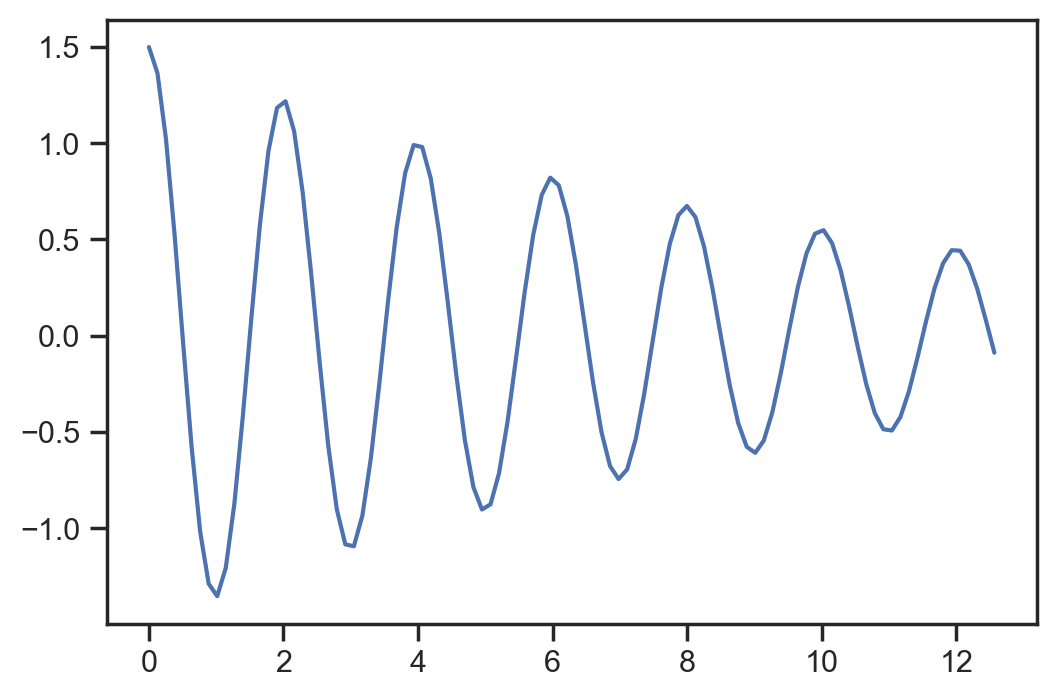

In [6]:
plt.plot(ts, ys);

Wait a minute! If you are paying attention you should have noticed that I added a ";" at the end of the line. Was this really necessary? What would happen if I did not do that?

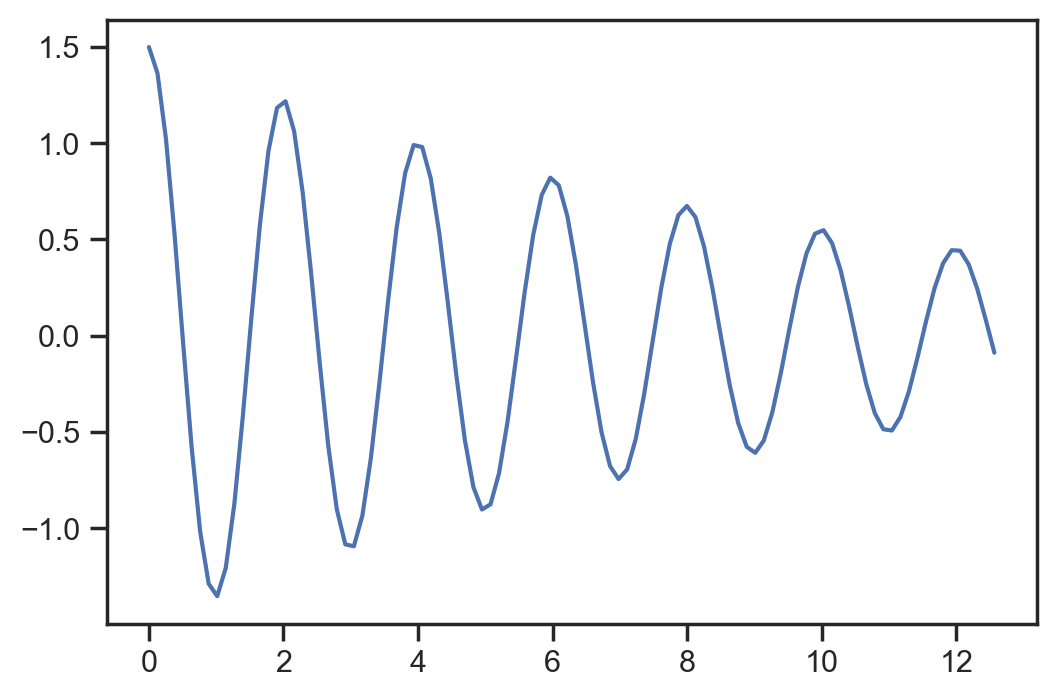

In [7]:
plt.plot(ts, ys);

It seems to work, but some text is also printed before the figure. Aha! This is because plot returns a list of the objects that have been plotted for future reference. But what does the ";" do. Well, all it does is it suppresses this output so that it is not printed. I will be using it from now on if I only want to see the figure and nothing else.

That was a simple way to plot the figure. But, I typically use the following more extensive version because it allows me to specify certain details like the size or the quality of the plot:

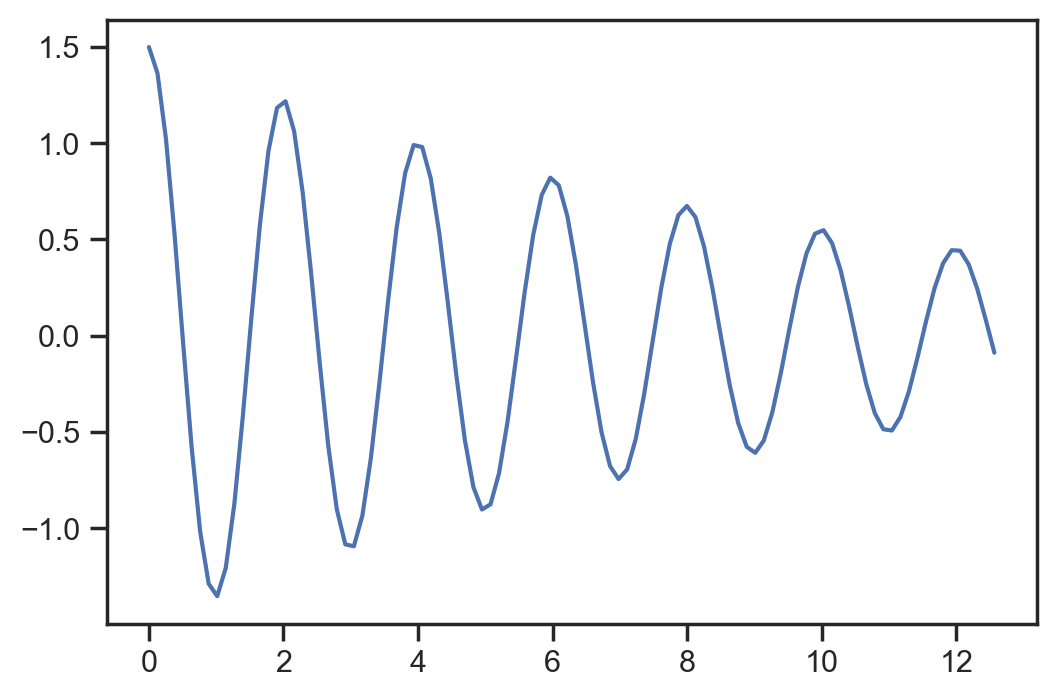

In [8]:
fig, ax = plt.subplots()
ax.plot(ts, ys);

Let's now add some more details in the plot.
Let's add x and y labels, and a title.

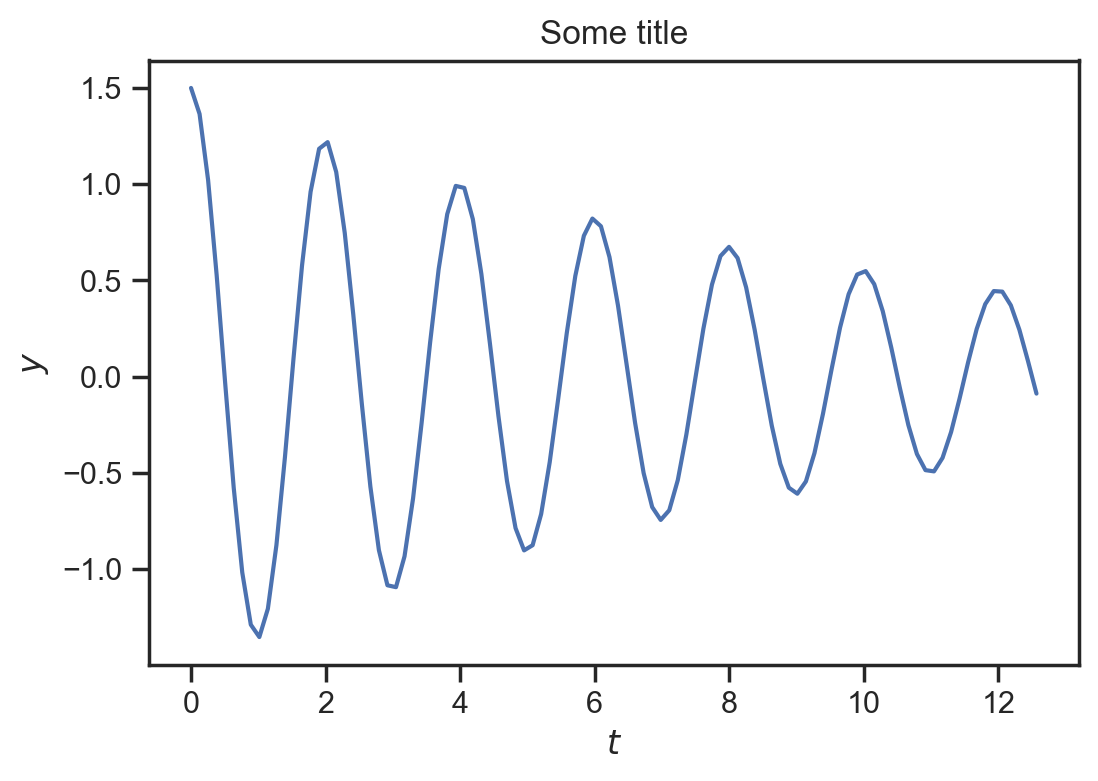

In [9]:
fig, ax = plt.subplots()
ax.plot(ts, ys)
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
ax.set_title('Some title');

You may have guessed it, but you just plotted the position of a harmonic oscillator with dumping! Think of the response of a spring-mass system with some dashpot taking out energy (e.g., the suspension system of car).

Let's now add one more function to the plot.
We are going to add the derivative of the position as a function of time, i.e., the velocity of the harmonic oscillator.
It is:

$$
\begin{array}{ccc}
v(t) &=& f'(t) = -0.1 e^{-0.1t}\left[\cos(\pi t) + 0.5\sin(\pi t)\right] + e^{-0.1t}\left[-\pi\sin(\pi t)+0.5\pi\sin(\pi t)\right]\\
&=&-0.1f(t) + e^{-0.1t}\left[-\pi\sin(\pi t)+0.5\pi\cos(\pi t)\right].
\end{array}
$$

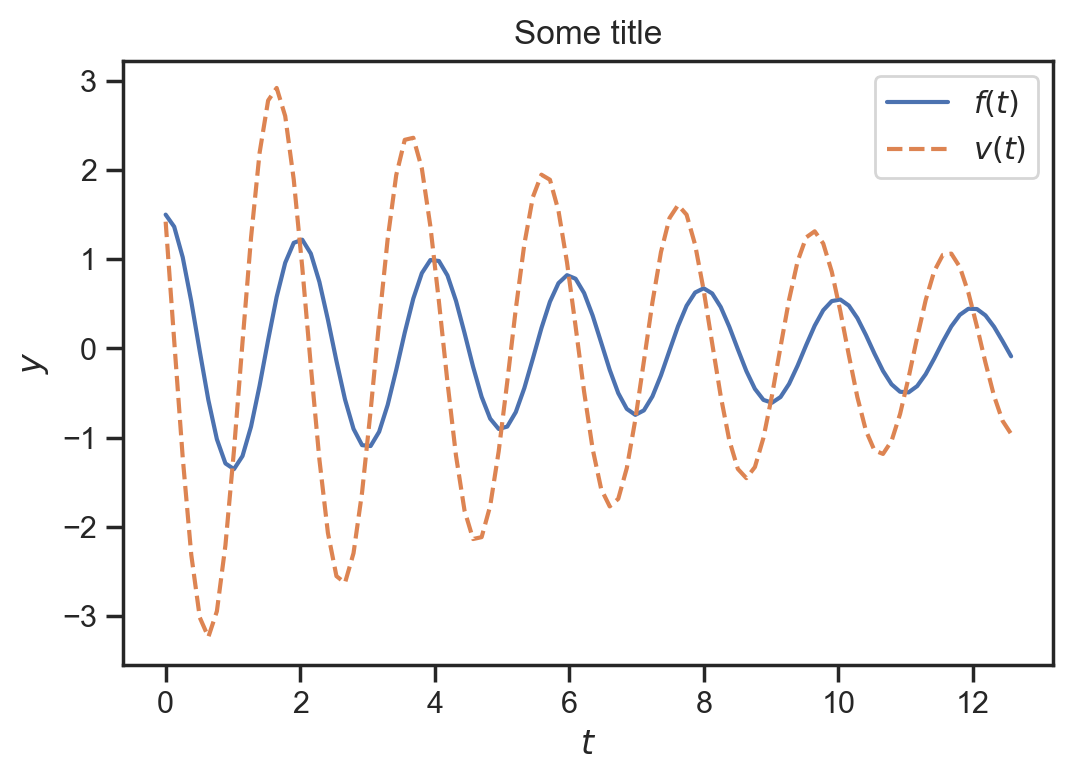

In [10]:
vs = -0.1 * ys + np.exp(-0.1 * ts) * (-np.pi * np.sin(np.pi * ts) + 0.5 * np.pi * np.cos(np.pi * ts))
fig, ax = plt.subplots()
ax.plot(ts, ys, label='$f(t)$')
ax.plot(ts, vs, '--', label='$v(t)$')
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
ax.set_title('Some title')
plt.legend(loc='best');

Notice that the colors are automatically different for the two curves.
However, you have to specify a different style.
You can also change the colors:

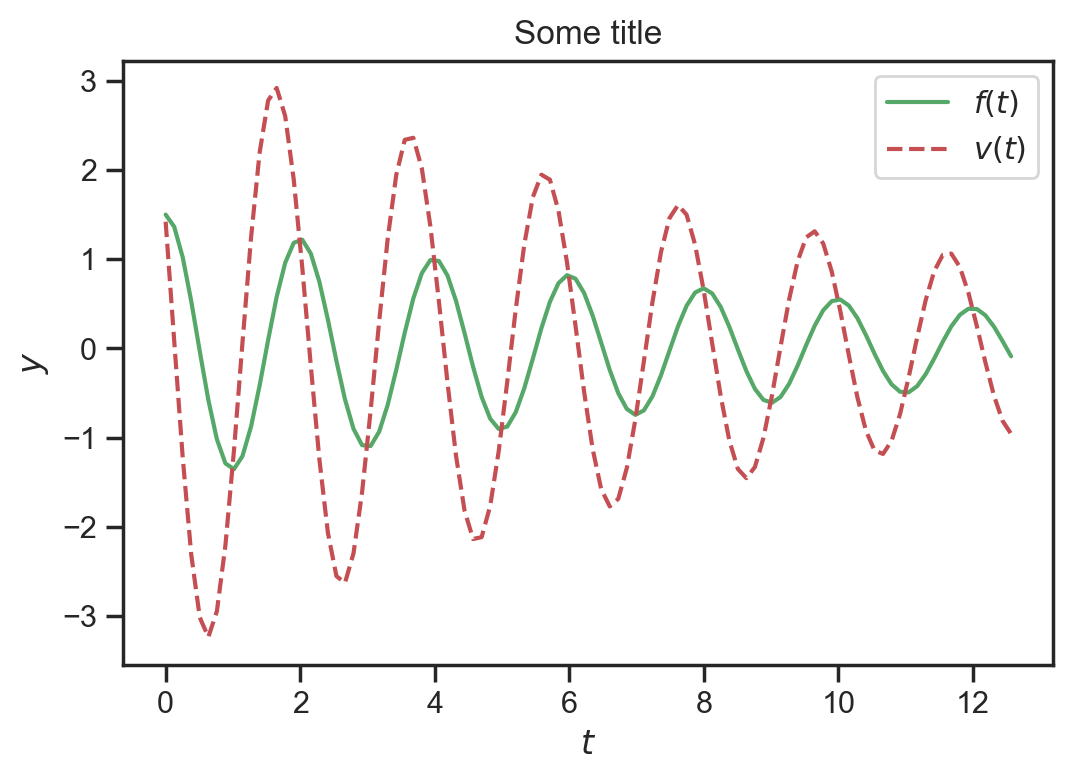

In [11]:
fig, ax = plt.subplots()
ax.plot(ts, ys, 'g', label='$f(t)$')
ax.plot(ts, vs, 'r--', label='$v(t)$')
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
ax.set_title('Some title')
plt.legend(loc='best');

You don't have to memorize the details of the style right now. A simple Google search can reveal the info you need and you will eventually start to remember the details.

Let's plot the same data on the so-called **phase space** (position vs velocity).

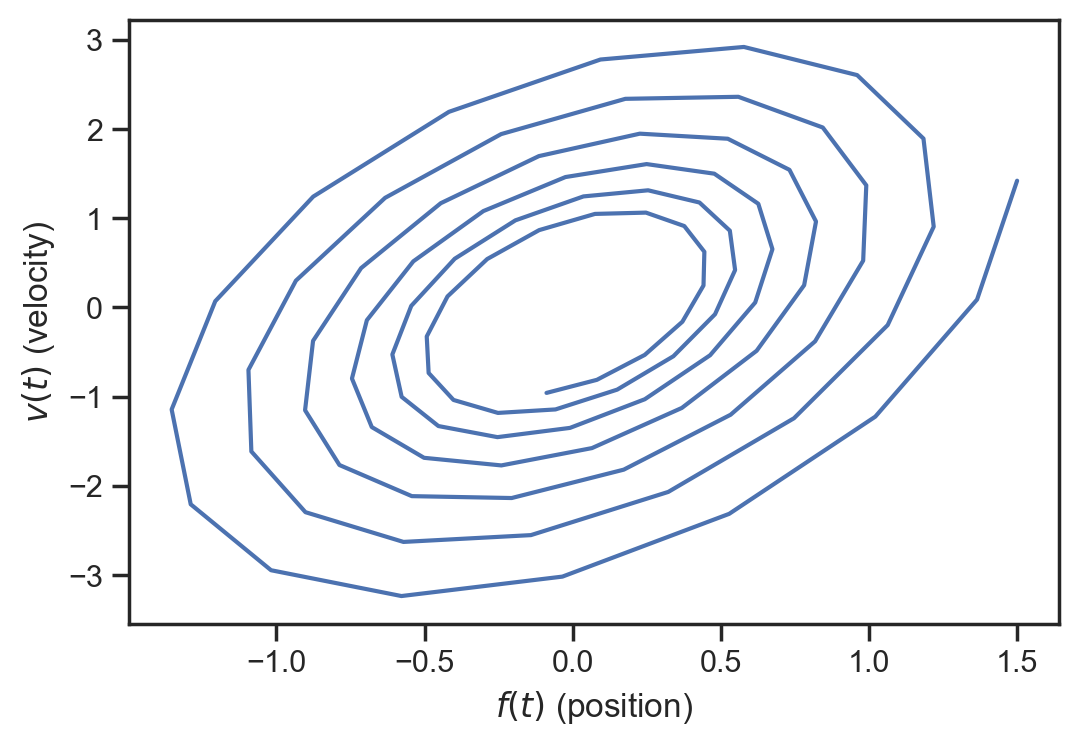

In [12]:
fig, ax = plt.subplots()
ax.plot(ys, vs)
ax.set_xlabel('$f(t)$ (position)')
ax.set_ylabel('$v(t)$ (velocity)');

We get a nice spiral centered around $(0, 0)$.
For the dumped harmonic oscilator, $(0, 0)$ is the steady state solution.
This is were the physical system goes after a lot of time.

(lecture04:saving-plots)=
## Saving figures to files

You now know how to make figures.
You can see them in the jupyter notebooks you are running.
But what if you want to extract them so that you can put them in a paper or your presentation.
You can take a screenshot of them, but that's kind of ridiculous, isn't it?
Here is how you can save a figure to pretty much any format you like:

In [13]:
fig.savefig('pendulum.png')

This is saved in your current working directory.
Here it is:

In [14]:
!ls -lh pendulum.png

-rw-r--r--@ 1 iliasbilionis  staff   202K Aug  9 09:32 pendulum.png


And you can make save your figure in multiple formats:

In [15]:
fig.savefig('pendulum.jpg')
fig.savefig('pendulum.pdf')
fig.savefig('pendulum.svg')
!ls -lh pendulum.*

-rw-r--r--@ 1 iliasbilionis  staff   239K Aug  8 12:53 pendulum.jpg
-rw-r--r--  1 iliasbilionis  staff    15K Aug  8 12:53 pendulum.pdf
-rw-r--r--@ 1 iliasbilionis  staff   202K Aug  8 12:53 pendulum.png
-rw-r--r--  1 iliasbilionis  staff    27K Aug  8 12:53 pendulum.svg


For more options see the documentation of [`savefig()`](http://jupyterbook.org).

## Questions

+ Rerun the code blocks above, but use a higher data collection frequency. We used 100 timesteps between times 0 and $4\pi$. Double and quadruple that number to make the plotted curves look smoother.
+ Rerun the code blocks above for a much longer time so that your spiral really starts touching $(0, 0)$.